In [1]:
%pylab inline
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pysal.esda.mapclassify import User_Defined

Populating the interactive namespace from numpy and matplotlib


We have some questions:
* What is the distribution of votes at the municipal level?
* How does the distribution of abstentionism look like?
* Is abstentionism correlated with any particular election outcome?
* What where the most divided municipalities (regardless of the outcome)?
* What is the distribution of the YES and the NO outcomes?

In [2]:
datos = pd.read_excel('Datos/Base_Elecciones_dta.xlsx')
#datps = gp.GeoDataFrame(datos)
mpios = gp.read_file('Datos/mpio/mpio.shp')
datos = gp.GeoDataFrame(datos)
mpios['cod_danelong'] = mpios['MPIOS'].astype('int')
deptos = gp.read_file('Datos/depto/depto.shp')

In [3]:
datos = datos.merge(mpios,on='cod_danelong')

In [60]:
datos['porcentaje_si'] = pd.Series() 
datos['porcentaje_si'][datos['ganador1si2no']==1] = datos['porcentaje_ganador']
datos['porcentaje_si'][datos['ganador1si2no']==2] = 1. - datos['porcentaje_ganador']
datos['porcentaje_no'] = pd.Series() 
datos['porcentaje_no'][datos['ganador1si2no']==2] = datos['porcentaje_ganador']
datos['porcentaje_no'][datos['ganador1si2no']==1] = 1. - datos['porcentaje_ganador']
datos['division'] = abs(datos.porcentaje_si-datos.porcentaje_no)

/home/saf537/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/saf537/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/saf537/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/saf537/anaconda2/lib/python2.7/site-packages/ipykernel/

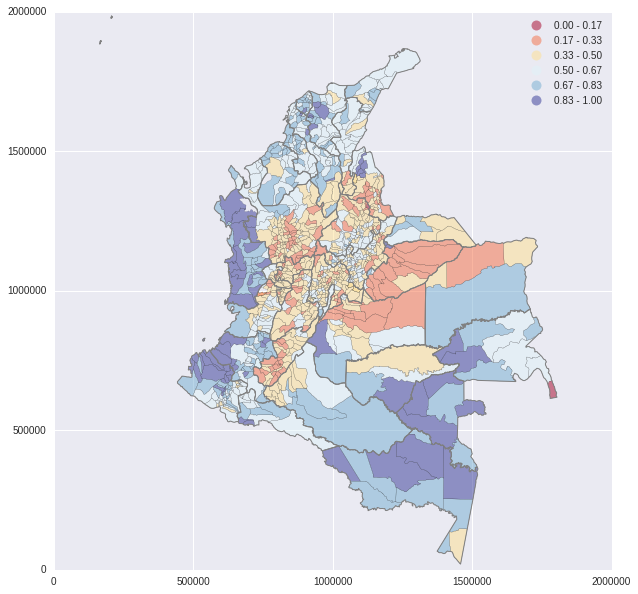

In [59]:
#deptos.plot(alpha=0.0)
figsize=(10,10)
fig, ax = plt.subplots(1, 1, figsize = (figsize))
datos.plot('porcentaje_si',cmap='RdYlBu',linewidth=0.1,scheme='equal_interval',legend=True,k=6,ax=ax)
deptos.plot(alpha=0.0,linewidth=1,c='grey',ax=ax)
#ax.plot()
#plt.figure()
plt.savefig('Porcentaje_si.png')

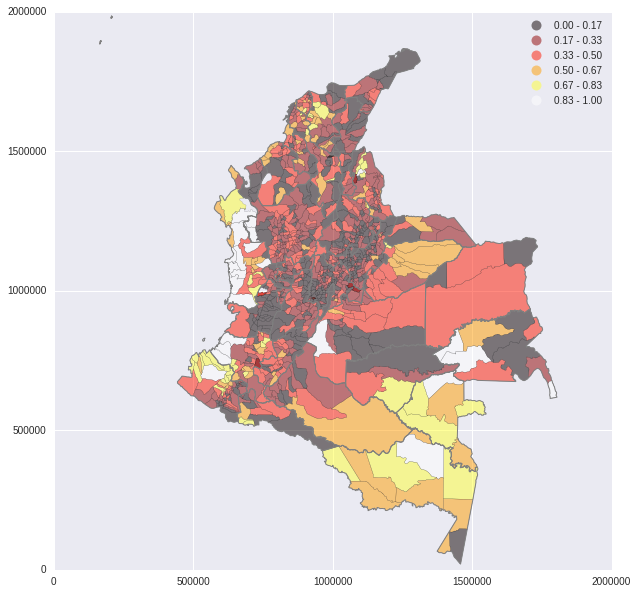

In [62]:
#deptos.plot(alpha=0.0)
figsize=(10,10)
fig, ax = plt.subplots(1, 1, figsize = (figsize))
datos.plot('division',cmap='hot',linewidth=0.1,scheme='equal_interval',legend=True,k=6,ax=ax)
deptos.plot(alpha=0.0,linewidth=1,c='grey',ax=ax)
#ax.plot()
#plt.figure()
plt.savefig('Division.png')

In [48]:
datos[list('CARTAGENA' in x for x in datos['NOMBRE_MPI'])]['cod_danelong']

210    13001.0
375    18150.0
Name: cod_danelong, dtype: float64

In [51]:
datos_compl = pd.read_excel('Datos/adm_municipios2.xls')
datos_compl['cod_danelong'] = datos_compl['divipola 2']
deptos = gp.read_file('Datos/depto/depto.shp')

In [53]:
datos = datos.merge(datos_compl,on='cod_danelong')


In [55]:
datos.columns

Index([                               u'departamento',
                                 u'cod_registraduria',
                              u'porcentaje_escrutado',
                                     u'votos_ganador',
                                     u'ganador1si2no',
                                u'porcentaje_ganador',
                                              u'var7',
                                         u'municipio',
                                         u'depto_mun',
                                          u'cod_dane',
                                              u'dpto',
                                              u'mpio',
                                      u'cod_danelong',
                                              u'AREA',
                                          u'CLASEMUN',
                                              u'DPTO',
                                          u'HECTARES',
                                              u'MPIO',
          